Author : Anirudh Sathish 
Roll No : CS20B1125 
Question 5 

importing neccesary libraries 

In [179]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

Reading the images

In [180]:
queryImageBGR = cv2.imread("queryimage.png")
referenceImage1BGR = cv2.imread("refimage1.png")
referenceImage2BGR = cv2.imread("refimage2.png")

Convert all to RGB 

In [181]:
queryImage = cv2.cvtColor(queryImageBGR,cv2.COLOR_BGR2RGB)
referenceImage1  = cv2.cvtColor(referenceImage1BGR ,cv2.COLOR_BGR2RGB)
referenceImage2  = cv2.cvtColor(referenceImage2BGR ,cv2.COLOR_BGR2RGB)

Further convert to gray scale 

In [182]:
queryImageGray = cv2.cvtColor(queryImage,cv2.COLOR_RGB2GRAY)
referenceImage1Gray  = cv2.cvtColor(referenceImage1 ,cv2.COLOR_RGB2GRAY)
referenceImage2Gray  = cv2.cvtColor(referenceImage2 ,cv2.COLOR_RGB2GRAY) 

Find their histograms 

Histogram of query image

In [183]:
hist_queryImage = cv2.calcHist([queryImageGray],[0],None,[256],[0,256])

Histogram of reference image 

In [184]:
hist_referenceImage1 = cv2.calcHist([referenceImage1Gray],[0],None,[256],[0,256])
hist_referenceImage2 = cv2.calcHist([referenceImage2Gray],[0],None, [256],[0,256]) 

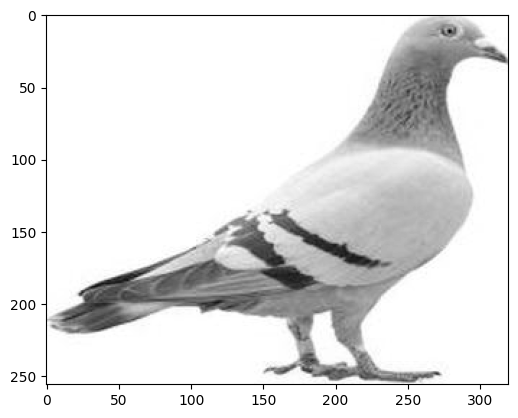

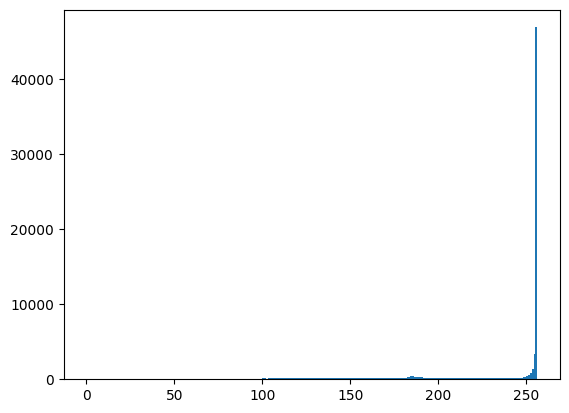

In [185]:
# Display the histogram
plt.imshow(referenceImage1Gray,cmap = 'gray')
plt.show()
plt.hist(referenceImage1Gray.ravel(), 256, [0, 256])
plt.show()


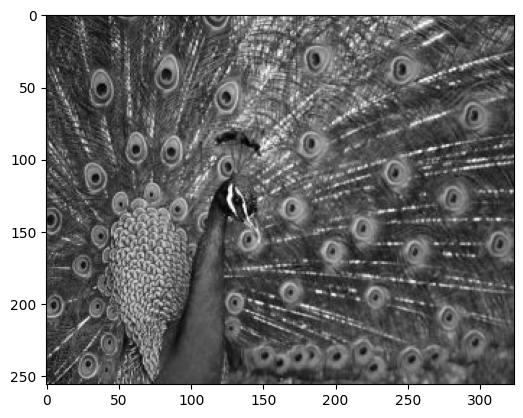

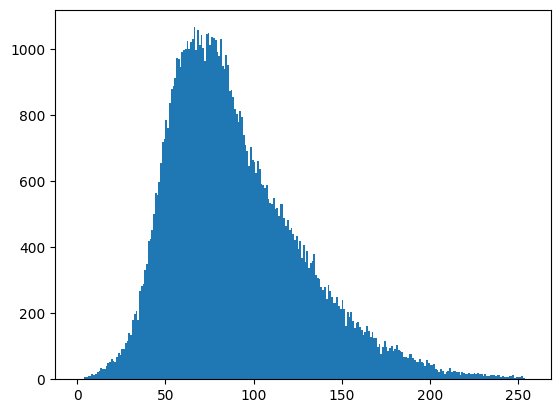

In [186]:
# Display the histogram
plt.imshow(referenceImage2Gray,cmap = 'gray')
plt.show()
plt.hist(referenceImage2Gray.ravel(), 256, [0, 256])
plt.show()

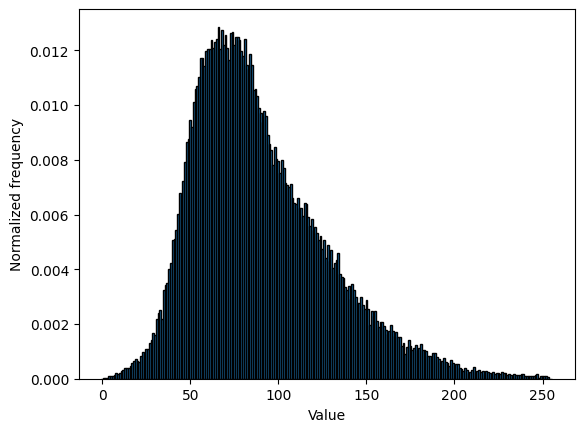

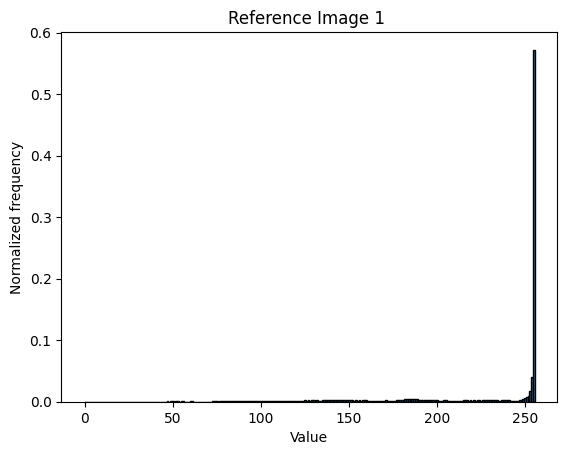

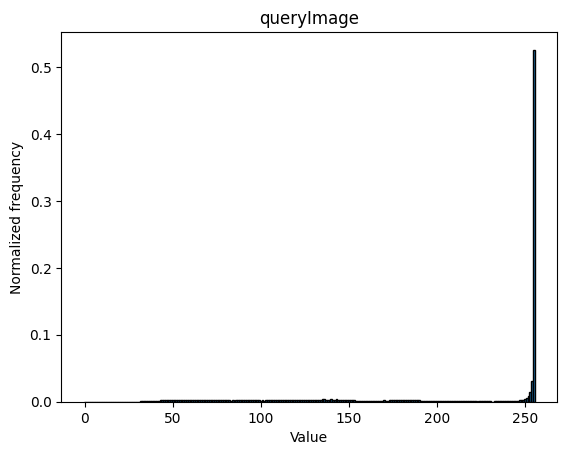

In [187]:
hist_reference_2,bins_rf2 = np.histogram(referenceImage2Gray.ravel(),256,[0,256])
hist_reference_2 = hist_reference_2 / np.sum(hist_reference_2)
# Plot the normalized histogram
plt.bar(bins_rf2[:-1], hist_reference_2, width=np.diff(bins_rf2), edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Normalized frequency")
plt.show()
plt.title("Reference Image 2 ")

hist_reference_1 , bins_rf1 = np.histogram(referenceImage1Gray.ravel(),256,[0,256])
hist_reference_1 = hist_reference_1 / np.sum(hist_reference_1)
# Plot the normalized histogram
plt.bar(bins_rf1[:-1], hist_reference_1, width=np.diff(bins_rf1), edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Normalized frequency")
plt.title("Reference Image 1 ")
plt.show()

hist_queryImage_q , bins_q = np.histogram(queryImageGray.ravel(),256,[0,256])
hist_queryImage_q = hist_queryImage_q / np.sum(hist_queryImage_q)
# Plot the normalized histogram
plt.bar(bins_q[:-1], hist_queryImage_q, width=np.diff(bins_q), edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Normalized frequency")
plt.title("queryImage")
plt.show()

In [188]:
# normalise histogram distances 
def findBhatacharyaDistance(hist_source ,hist_ref):
    values = []
    import math
    summation = 0 
    for i in range(256):
        prod = hist_source[i]*hist_ref[i]
        sqr = math.sqrt(prod)
        summation += sqr
    final = math.log(summation)*-1

    return final 

In [190]:
distance_query_ref1 = findBhatacharyaDistance(hist_queryImage_q,hist_reference_1)
print("The distance between query and reference image 1  :" +str(round(distance_query_ref1,3)))

The distance between query and reference image 1  0.038


In [192]:
distance_query_ref2 = findBhatacharyaDistance(hist_queryImage_q,hist_reference_2)
print("The distance between query image and refernce image 2 :" +str(round(distance_query_ref2,3)))

The distance between query image and refernce image 2 :0.541
